In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report


df = pd.read_csv('CleanedData.csv')
data = df.dropna()

from sklearn.ensemble import RandomForestClassifier
y_cls = (data['arr_delay'] > 15).astype(int)

classifier = RandomForestClassifier()
Model = LinearRegression()



feature_cols = [  
    'carrier_ct',
    'weather_ct',
    'nas_ct',
    'late_aircraft_ct',
    'arr_cancelled',
    'arr_diverted',
    'carrier_delay',
    'weather_delay',
    'nas_delay',
    'late_aircraft_delay',
    'month'
    ]
X = data[feature_cols]
y_reg = data['arr_delay']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_cls, test_size=0.2, random_state=42) #Classification
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_reg, test_size=0.2, random_state=42) #Regression


classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_c, y_train_c)
Model.fit(X_train_r, y_train_r)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
y_pred_c = classifier.predict(X_test_c)
print("Classification accuracy:", accuracy_score(y_test_c, y_pred_c))
print("\nClassification report:\n", classification_report(y_test_c, y_pred_c))



Classification accuracy: 0.9994965034965035

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1706
           1       1.00      1.00      1.00     34044

    accuracy                           1.00     35750
   macro avg       1.00      1.00      1.00     35750
weighted avg       1.00      1.00      1.00     35750



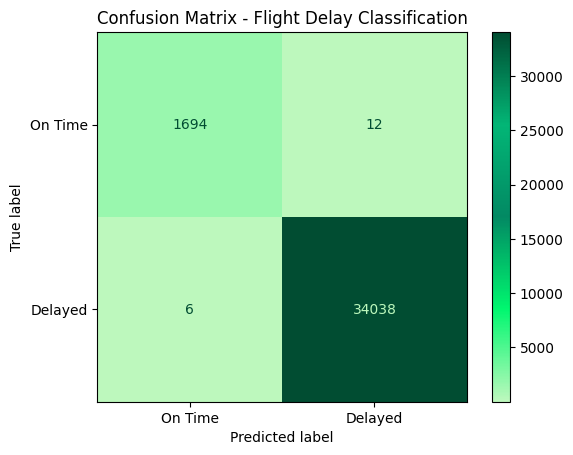

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from matplotlib.colors import LinearSegmentedColormap
cm = confusion_matrix(y_test_c, y_pred_c)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["On Time", "Delayed"])

custom_cmap = LinearSegmentedColormap.from_list(
    "my_cmap", ["#bdf8bd", "#00f76f", "#028963", "#02b676", "#014d32"]  
)
# Plot
disp.plot(cmap=custom_cmap)
plt.title("Confusion Matrix - Flight Delay Classification")
plt.show()

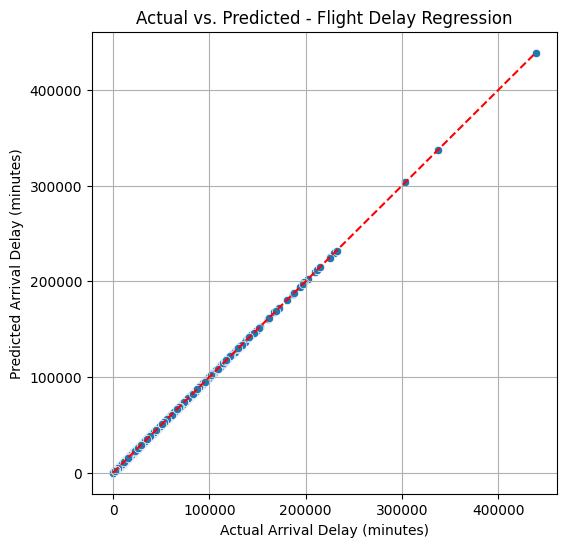

In [18]:
import seaborn as sns

# Get predictions
y_pred_r = Model.predict(X_test_r)

# Plot scatter of actual vs. predicted
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test_r, y=y_pred_r)
plt.plot([y_test_r.min(), y_test_r.max()], [y_test_r.min(), y_test_r.max()], 'r--')  # perfect fit line
plt.xlabel("Actual Arrival Delay (minutes)")
plt.ylabel("Predicted Arrival Delay (minutes)")
plt.title("Actual vs. Predicted - Flight Delay Regression")
plt.grid()
plt.show()

In [19]:
print("Regression Mean squared error:", mean_squared_error(y_test_r, y_pred_r))
print("Regression R² score:", r2_score(y_test_r, y_pred_r))

Regression Mean squared error: 981.8084703850475
Regression R² score: 0.999992578314586


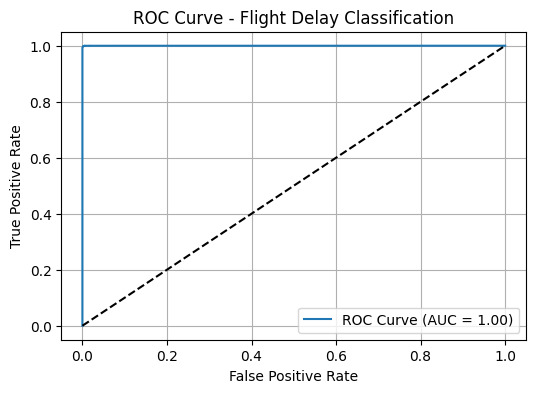

In [11]:
from sklearn.metrics import roc_curve, auc

# Get probability estimates for positive class
y_prob = classifier.predict_proba(X_test_c)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test_c, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Flight Delay Classification")
plt.legend()
plt.grid()
plt.show()


In [4]:
new_data = pd.DataFrame({
    'carrier_ct': [0],            # e.g., 2 carrier-related issues
    'weather_ct': [0],            # 0 weather issues
    'nas_ct': [0],                # 1 NAS issue
    'late_aircraft_ct': [0],      # 3 late aircraft issues
    'arr_cancelled': [0],         # flight was NOT cancelled
    'arr_diverted': [0],          # flight was NOT diverted
    'carrier_delay': [5],        # 15 min carrier delay
    'weather_delay': [0],         # 0 min weather delay
    'nas_delay': [0],            # 20 min NAS delay
    'late_aircraft_delay': [0],  # 25 min late aircraft delay
    'month': [2]                  # July, for example
})

# Predict with your trained regression model
classification = classifier.predict(new_data)
print("Flight will be late:", "Yes" if classification[0] == 1 else "No")
if classification[0] == 1:
    prediction = Model.predict(new_data)
    print("Predicted arrival delay (minutes):", prediction[0])



Flight will be late: No
